In [21]:
import tensorflow as tf

In [22]:
import numpy as np

In [23]:
import pandas as pd

In [24]:
!pip install matplotlib

In [25]:
import matplotlib.pyplot as plt

In [26]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


'C:\Users\My' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
pip install scikit-learn


'C:\Users\My' is not recognized as an internal or external command,
operable program or batch file.


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install sklearn


Note: you may need to restart the kernel to use updated packages.


'C:\Users\My' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
from sklearn.feature_extraction.text import CountVectorizer


In [30]:
count=CountVectorizer()

In [31]:
data=pd.read_csv(r'C:\Users\My Pc\Nlp\Train.csv')

In [32]:
data.head()

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

In [33]:
!pip install matplotlib

In [37]:
import matplotlib.pyplot as plt

In [38]:
fig=plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

In [39]:
colors=['skyblue', 'pink']

In [40]:
pos=data[data['label']==1]

In [41]:
neg=data[data['label']==0]

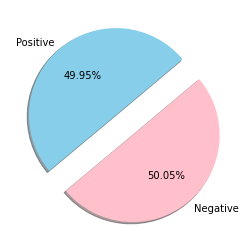

In [42]:
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.2f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 40,
                 explode=(0, 0.3))

In [43]:
import re

In [44]:
def preprocessor(text):
    text=re.sub('<[^>]*>',"",text)
    emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) +\
            ' '.join(emojis).replace('-','')
    return text
data['text']=data['text'].apply(preprocessor)

In [45]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenize(text):
    return text.split()
def tokenizer(text):
    return [porter.stem(word) for word  in text.split()]

In [46]:
# to visualize the -ve , +ve using a wordcloud . first remove the stopwords

In [47]:
import nltk

In [48]:
from nltk.corpus import stopwords

In [49]:
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\My
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
stop=stopwords.words('english')

In [51]:
!pip install wordcloud

In [52]:
from wordcloud import WordCloud

In [ ]:
positivedata=data[data['label']==1]
positivedata=positivedata['text']
negdata=data[data['label']==0]
negdata=negdata['text']
def wordcloud_draw(data, color='white'):
    words=''.join(data)
    cleaned_word=''.join([word for word in words.split()
                         if(word!='movie' and word!='film')])
    wordcloud=WordCloud(stopwords=stop, background_color=color, width=2500, 
                      height=200).generate(cleaned_word)
    plt.figure(1, figure=(10,7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print('positive words')
wordcloud_draw(positivedata, 'white')
print('negative')
wordcloud_draw(negdata)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenizer_porter, use_idf=True,norm='l2',smooth_idf=True)

In [ ]:
y=data.label.values
x=tfidf.fit_transform(data.text)

In [ ]:
from sklearn.model_selection import trin_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, random_state=1, test_size=0.5, shuffle=False)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
clf=LogisticRegressionCV(cv=6, scoring='accuracy', random-state=0, n_jobs=1, 
                        verbose=3, max_iter=500).fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)
from sklearn import metrics

In [ ]:
print('accuracy', metrics.accuracy_score(y_test, y_pred))